In [1]:
#%matplotlib widget

In [2]:
import calendar
import json
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from datetime import timedelta


import warnings
warnings.filterwarnings("ignore")

In [3]:
file = open("watch-history.json", errors='replace')

In [4]:
text = file.read()

In [5]:
type(text)

str

In [6]:
j=json.loads(text)

In [7]:
streaming_history = pd.DataFrame(j)

In [8]:

streaming_history.head(5)

,header,title,titleUrl,subtitles,time,products,activityControls
0,YouTube,Watched Rahul Subramanian | Crowd work Special...,https://www.youtube.com/watch?v=7dRjFxqCCQk,"[{'name': 'Random Chikibum', 'url': 'https://w...",2023-05-04T23:34:00.079Z,[YouTube],[YouTube watch history]
1,YouTube,Watched Nvidia Said No.. I said YES! - The 100...,https://www.youtube.com/watch?v=vz-rpRYFhRo,"[{'name': 'Linus Tech Tips', 'url': 'https://w...",2023-05-04T21:45:23.215Z,[YouTube],[YouTube watch history]
2,YouTube,Watched Biswa Kalyan Rath | Mood Kharaab | New...,https://www.youtube.com/watch?v=V_c-oLhaR_4,"[{'name': 'Biswa Kalyan Rath', 'url': 'https:/...",2023-05-04T21:43:48.572Z,[YouTube],[YouTube watch history]
3,YouTube,Watched Lucky Lefty OR: I Lost My Right Nut An...,https://www.youtube.com/watch?v=A2Rdh82XGrY,"[{'name': 'Nimesh Patel', 'url': 'https://www....",2023-05-03T03:09:38.598Z,[YouTube],[YouTube watch history]
4,YouTube,Watched Is A Runaway Black Hole Creating A Tra...,https://www.youtube.com/watch?v=UYVUPd3_Fus,"[{'name': 'StarTalk', 'url': 'https://www.yout...",2023-05-03T03:09:24.708Z,[YouTube],[YouTube watch history]


In [9]:
streaming_history.time = pd.to_datetime(streaming_history.time)

In [10]:
streaming_history

,header,title,titleUrl,subtitles,time,products,activityControls
0,YouTube,Watched Rahul Subramanian | Crowd work Special...,https://www.youtube.com/watch?v=7dRjFxqCCQk,"[{'name': 'Random Chikibum', 'url': 'https://w...",2023-05-04 23:34:00.079000+00:00,[YouTube],[YouTube watch history]
1,YouTube,Watched Nvidia Said No.. I said YES! - The 100...,https://www.youtube.com/watch?v=vz-rpRYFhRo,"[{'name': 'Linus Tech Tips', 'url': 'https://w...",2023-05-04 21:45:23.215000+00:00,[YouTube],[YouTube watch history]
2,YouTube,Watched Biswa Kalyan Rath | Mood Kharaab | New...,https://www.youtube.com/watch?v=V_c-oLhaR_4,"[{'name': 'Biswa Kalyan Rath', 'url': 'https:/...",2023-05-04 21:43:48.572000+00:00,[YouTube],[YouTube watch history]
3,YouTube,Watched Lucky Lefty OR: I Lost My Right Nut An...,https://www.youtube.com/watch?v=A2Rdh82XGrY,"[{'name': 'Nimesh Patel', 'url': 'https://www....",2023-05-03 03:09:38.598000+00:00,[YouTube],[YouTube watch history]
4,YouTube,Watched Is A Runaway Black Hole Creating A Tra...,https://www.youtube.com/watch?v=UYVUPd3_Fus,"[{'name': 'StarTalk', 'url': 'https://www.yout...",2023-05-03 03:09:24.708000+00:00,[YouTube],[YouTube watch history]
...,...,...,...,...,...,...,...
4775,YouTube,Watched I PUT TENZ ON MY BACK. HARD CARRY MODE...,https://www.youtube.com/watch?v=EQbdDLWs-4U,"[{'name': 'ShahZaM', 'url': 'https://www.youtu...",2022-04-06 03:59:37.555000+00:00,[YouTube],[YouTube watch history]
4776,YouTube,Watched 11 minutes of Shroud playing against o...,https://www.youtube.com/watch?v=WBBedUaEU2o,"[{'name': 'Shroud', 'url': 'https://www.youtub...",2022-04-06 01:31:44.390000+00:00,[YouTube],[YouTube watch history]
4777,YouTube,Watched I've never felt this way before - $60 ...,https://www.youtube.com/watch?v=jGyHT0t-mtw,"[{'name': 'Linus Tech Tips', 'url': 'https://w...",2022-04-06 00:46:50.131000+00:00,[YouTube],[YouTube watch history]
4778,YouTube,Watched I Tried to Break a Million Dollar Comp...,https://www.youtube.com/watch?v=ZDtaanCENbc,"[{'name': 'Linus Tech Tips', 'url': 'https://w...",2022-04-06 00:06:52.861000+00:00,[YouTube],[YouTube watch history]


In [11]:
streaming_history["date"] = streaming_history["time"].dt.floor('d')

In [12]:
#saving yt history as csv file
#streaming_history.to_csv("watch-history.csv",index=False)

In [13]:
by_date = streaming_history.groupby("date")[["title"]].count()
by_date = by_date.sort_index()

In [14]:
by_date.index

DatetimeIndex(['2022-04-05 00:00:00+00:00', '2022-04-06 00:00:00+00:00',
               '2022-04-07 00:00:00+00:00', '2022-04-08 00:00:00+00:00',
               '2022-04-09 00:00:00+00:00', '2022-04-10 00:00:00+00:00',
               '2022-04-11 00:00:00+00:00', '2022-04-12 00:00:00+00:00',
               '2022-04-13 00:00:00+00:00', '2022-04-14 00:00:00+00:00',
               ...
               '2023-04-24 00:00:00+00:00', '2023-04-25 00:00:00+00:00',
               '2023-04-26 00:00:00+00:00', '2023-04-27 00:00:00+00:00',
               '2023-04-28 00:00:00+00:00', '2023-04-29 00:00:00+00:00',
               '2023-05-01 00:00:00+00:00', '2023-05-02 00:00:00+00:00',
               '2023-05-03 00:00:00+00:00', '2023-05-04 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='date', length=380, freq=None)

In [15]:
by_date["weekday"] = by_date.index.weekday
by_date["week"] = by_date.index.week

In [16]:
by_date.title.sum()

4780

In [17]:
week = 0
prev_week = by_date.iloc[0]["week"]
continuous_week = np.zeros(len(by_date)).astype(int)
sunday_dates = []
for i, (_, row) in enumerate(by_date.iterrows()):
    if row["week"] != prev_week:
        week += 1
        prev_week = row["week"]
    continuous_week[i] = week
by_date["continuous_week"] = continuous_week 
continuous_week.sum()

10587

In [18]:
videos = np.full((7, continuous_week.max()+1), np.nan)

for index, row in by_date.iterrows():
    videos[row["weekday"]][row["continuous_week"]] = row["title"]

<Axes: >

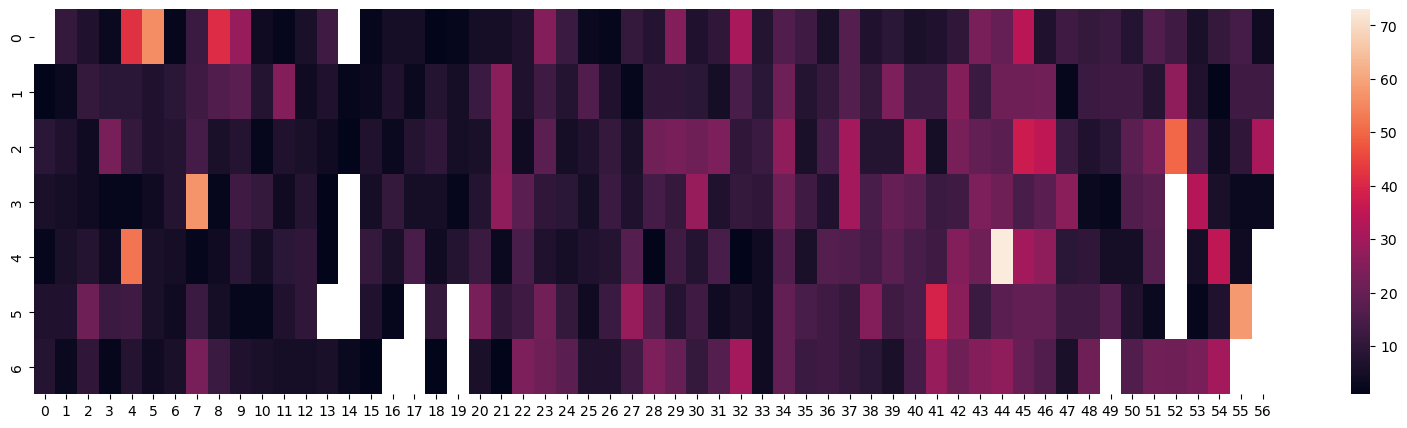

In [19]:
fig = plt.figure(figsize=(20,5))
ax = plt.subplot()
mask = np.isnan(videos)
sns.heatmap(videos, ax = ax)

In [20]:
min_date = streaming_history["time"].min()
first_monday = min_date - timedelta(min_date.weekday())
mons = [first_monday + timedelta(weeks=wk) for wk in range(continuous_week.max())]
x_labels = [calendar.month_abbr[mons[0].month]]
x_labels.extend([
    calendar.month_abbr[mons[i].month] if mons[i-1].month != mons[i].month else "" 
    for i in range(1, len(mons))])
x_labels.append("") 
y_labels = ["Mon", "Tue", "Wed", "Thur", "Fri", "Sat", "Sun"]

[Text(0, 0.5, 'Mon'),
 Text(0, 1.5, 'Tue'),
 Text(0, 2.5, 'Wed'),
 Text(0, 3.5, 'Thur'),
 Text(0, 4.5, 'Fri'),
 Text(0, 5.5, 'Sat'),
 Text(0, 6.5, 'Sun')]

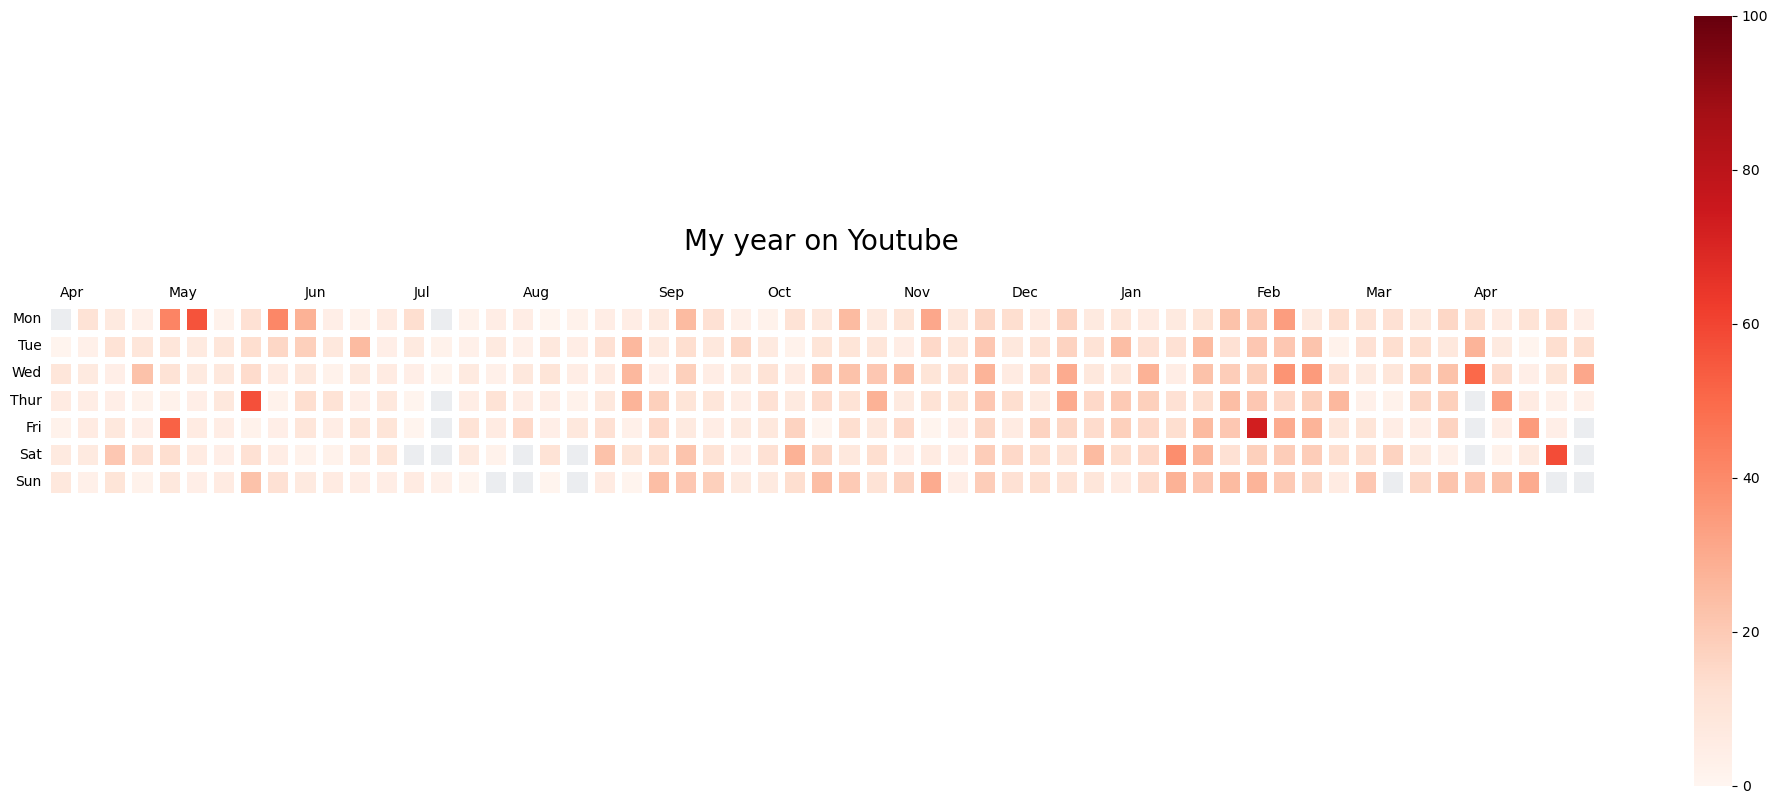

In [21]:
fig = plt.figure(figsize=(25,10))
ax = plt.subplot()

ax.set_title("My year on Youtube", fontsize=20,pad=40)
ax.xaxis.tick_top()
ax.tick_params(axis='both', which='both',length=0)
ax.set_facecolor("#ebedf0") 
fig.patch.set_facecolor('white')


sns.heatmap(videos, linewidths=5, linecolor='white', square=True,
            mask=np.isnan(videos), cmap="Reds",
            vmin=0, vmax=100, cbar=True, ax=ax)


ax.set_xticklabels(x_labels, ha="left")
ax.set_yticklabels(y_labels, rotation=0)

In [22]:
#!! streamlit run yt_history.py

In [23]:
#streaming_history[streaming_history["header"]=='YouTube']

## Youtube Videos

In [24]:
len(streaming_history.query('header == "YouTube"'))

3702

In [25]:
#get index of rows where 'header' column is equal to 'Youtube'
by_date1 = streaming_history.query('header=="YouTube"').groupby("date")[["title"]].count()
by_date1 = by_date1.sort_index()

In [26]:
by_date1["weekday"] = by_date1.index.weekday
by_date1["week"] = by_date1.index.week

In [27]:
by_date1


,title,weekday,week
date,,,
2022-04-05 00:00:00+00:00,1,1,14
2022-04-06 00:00:00+00:00,9,2,14
2022-04-07 00:00:00+00:00,6,3,14
2022-04-08 00:00:00+00:00,2,4,14
2022-04-09 00:00:00+00:00,7,5,14
...,...,...,...
2023-04-29 00:00:00+00:00,2,5,17
2023-05-01 00:00:00+00:00,4,0,18
2023-05-02 00:00:00+00:00,13,1,18


In [28]:
week1 = 0
prev_week1 = by_date1.iloc[0]["week"]
continuous_week1 = np.zeros(len(by_date1)).astype(int)
for i, (_, row) in enumerate(by_date1.iterrows()):
    if row["week"] != prev_week1:
        week1 += 1
        prev_week1 = row["week"]
    continuous_week1[i] = week1
by_date1["continuous_week"] = continuous_week1

In [29]:
videos1 = np.full((7, continuous_week1.max()+1), np.nan)

for index1, row in by_date1.iterrows():
    videos1[row["weekday"]][row["continuous_week"]] = row["title"]

[Text(0, 0.5, 'Mon'),
 Text(0, 1.5, 'Tue'),
 Text(0, 2.5, 'Wed'),
 Text(0, 3.5, 'Thur'),
 Text(0, 4.5, 'Fri'),
 Text(0, 5.5, 'Sat'),
 Text(0, 6.5, 'Sun')]

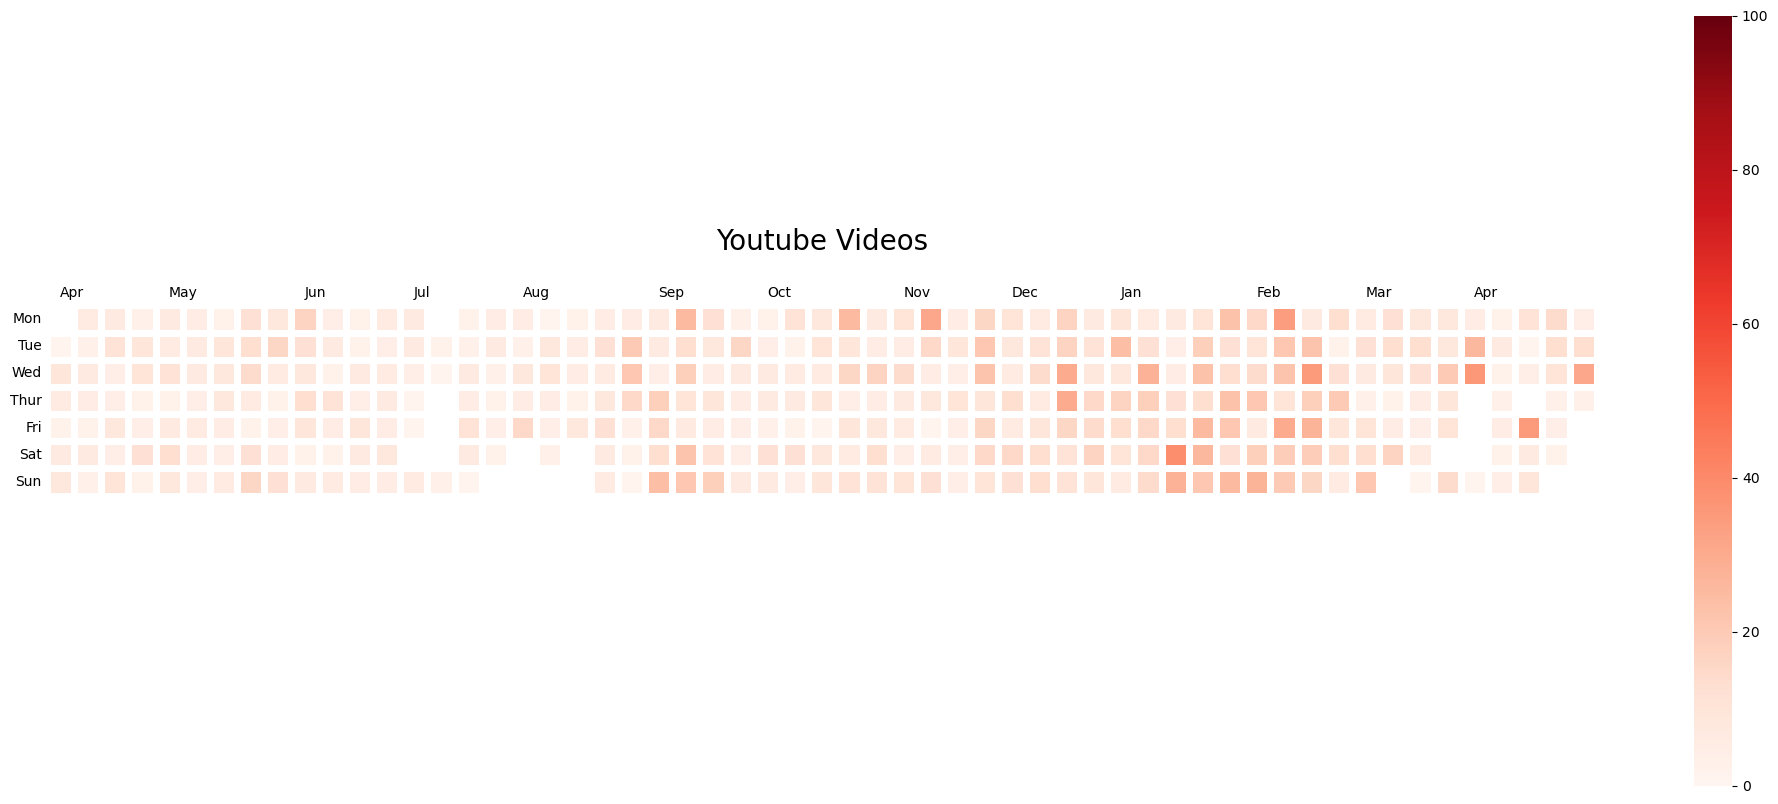

In [30]:
fig1 = plt.figure(figsize=(25,10))
ax1 = plt.subplot()

ax1.set_title("Youtube Videos", fontsize=20,pad=40)
ax1.xaxis.tick_top()
ax1.tick_params(axis='both', which='both',length=0)



sns.heatmap(videos1, linewidths=5, linecolor='white', square=True,
            mask=np.isnan(videos), cmap="Reds",
            vmin=0, vmax=100, cbar=True, ax=ax1)


ax1.set_xticklabels(x_labels, ha="left")
ax1.set_yticklabels(y_labels, rotation=0)

## Youtube Music

In [31]:
len(streaming_history.query('header == "YouTube Music"'))

1078

In [32]:
#get index of rows where 'header' column is equal to 'Youtube Music'
by_date2 = streaming_history.query('header=="YouTube Music"').groupby("date")[["title"]].count()
by_date2 = by_date2.sort_index()

In [33]:
by_date2["weekday"] = by_date2.index.weekday
by_date2["week"] = by_date2.index.week

In [34]:
by_date2

,title,weekday,week
date,,,
2022-04-11 00:00:00+00:00,5,0,15
2022-04-15 00:00:00+00:00,4,4,15
2022-04-23 00:00:00+00:00,17,5,16
2022-04-27 00:00:00+00:00,13,2,17
2022-05-02 00:00:00+00:00,35,0,18
...,...,...,...
2023-04-13 00:00:00+00:00,30,3,15
2023-04-16 00:00:00+00:00,19,6,15
2023-04-20 00:00:00+00:00,6,3,16


In [35]:
week2 = 0
prev_week2 = by_date2.iloc[0]["week"]
continuous_week2 = np.zeros(len(by_date2)).astype(int)
for i, (_, row) in enumerate(by_date2.iterrows()):
    if row["week"] != prev_week2:
        week2 += 1
        prev_week2 = row["week"]
    continuous_week2[i] = week2
by_date2["continuous_week"] = continuous_week2

In [36]:
videos2 = np.full((7, continuous_week2.max()+1), np.nan)

for index2, row in by_date2.iterrows():
    videos2[row["weekday"]][row["continuous_week"]] = row["title"]

In [37]:
x_labels2 = [calendar.month_abbr[mons[0].month]]
x_labels2.extend([
    calendar.month_abbr[mons[i].month] if mons[i-1].month != mons[i].month else "" 
    for i in range(1, 43)])
#x_labels2.append("") 
len(x_labels2)

43

[Text(0, 0.5, 'Mon'),
 Text(0, 1.5, 'Tue'),
 Text(0, 2.5, 'Wed'),
 Text(0, 3.5, 'Thur'),
 Text(0, 4.5, 'Fri'),
 Text(0, 5.5, 'Sat'),
 Text(0, 6.5, 'Sun')]

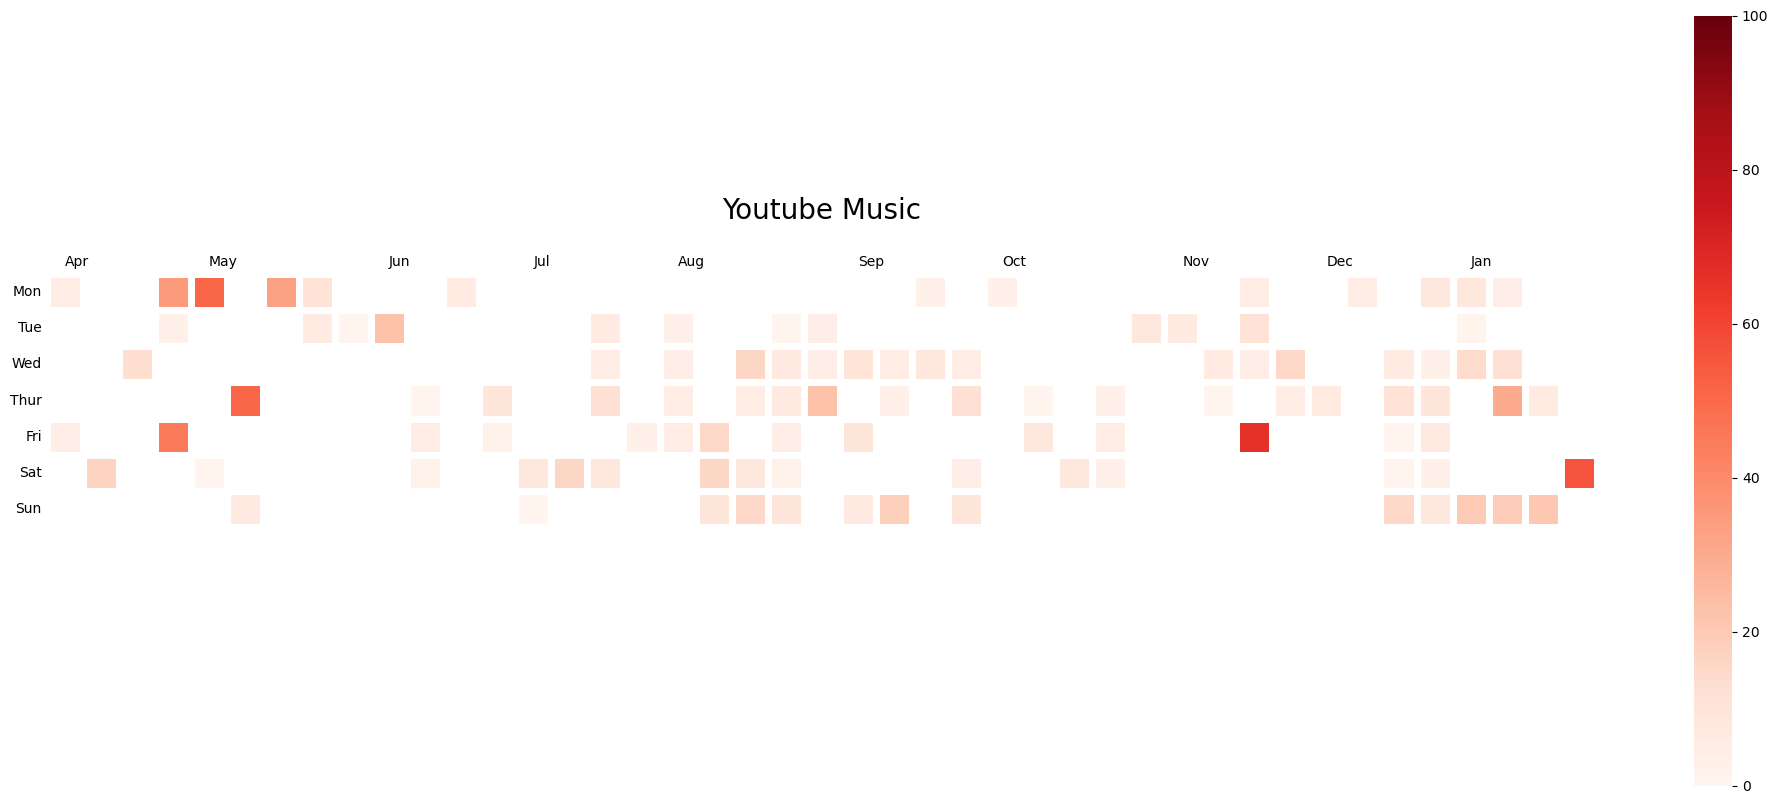

In [38]:
fig2 = plt.figure(figsize=(25,10))
ax2 = plt.subplot()

ax2.set_title("Youtube Music", fontsize=20,pad=40)
ax2.xaxis.tick_top()
ax2.tick_params(axis='both', which='both',length=0)



sns.heatmap(videos2, linewidths=5, linecolor='white', square=True,
            mask=np.isnan(videos2), cmap="Reds",
            vmin=0, vmax=100, cbar=True, ax=ax2)


ax2.set_xticklabels(x_labels2, ha="left")
ax2.set_yticklabels(y_labels, rotation=0)

In [39]:
#!! streamlit run yt_history.py